<a href="https://colab.research.google.com/github/IndahPurnamaSarii/Tugas3-Deeplearning/blob/main/Multilabel_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.optimizers import Adam

In [ ]:
import os
os.environ["KAGGLE_USERNAME"] = "stunting135" # Ganti dengan username Kaggle Anda
os.environ["KAGGLE_KEY"] = "1728b8e31fb0e63d5a327974ac6092bd" # Ganti dengan key yang ada di kaggle.json

In [ ]:
!kaggle datasets download -d stunting135/datasetmultilabel

Dataset URL: https://www.kaggle.com/datasets/stunting135/datasetmultilabel
License(s): unknown


In [ ]:
# prompt: unzip file movie-classifier.zip

!unzip datasetmultilabel.zip


Archive:  datasetmultilabel.zip
  inflating: Deeplearning/DatasetMultilabel_Indah Purnama Sari_202255202010/Gambar001.jpg  
  inflating: Deeplearning/DatasetMultilabel_Indah Purnama Sari_202255202010/Gambar002.jpg  
  inflating: Deeplearning/DatasetMultilabel_Indah Purnama Sari_202255202010/Gambar003.jpg  
  inflating: Deeplearning/DatasetMultilabel_Indah Purnama Sari_202255202010/Gambar004.jpg  
  inflating: Deeplearning/DatasetMultilabel_Indah Purnama Sari_202255202010/Gambar005.jpg  
  inflating: Deeplearning/DatasetMultilabel_Indah Purnama Sari_202255202010/Gambar006.jpg  
  inflating: Deeplearning/DatasetMultilabel_Indah Purnama Sari_202255202010/Gambar007.jpg  
  inflating: Deeplearning/DatasetMultilabel_Indah Purnama Sari_202255202010/Gambar008.jpg  
  inflating: Deeplearning/DatasetMultilabel_Indah Purnama Sari_202255202010/Gambar009.jpg  
  inflating: Deeplearning/DatasetMultilabel_Indah Purnama Sari_202255202010/Gambar010.jpg  
  inflating: Deeplearning/DatasetMultilabel_Inda

In [ ]:
#Now let us read metadata to get our Y values (multiple lables)
df = pd.read_csv('/content/Deeplearning/traindataset_Indah Purnama Sari_202255202010.csv')
print(df.head())     # printing first five rows of the file
print(df.columns)

df = df.iloc[:2000]  #Loading only first 2000 datapoints for memory reasons
#Need to read images using the tag from metadata.
#Otherwise, if read directly from the folder then images may not correspond to
#the metadata from the csv file.

          Id                                        Object  Biskuit  Minuman  \
0  Gambar001                        ['Biskuit', 'Minuman']        1        1   
1  Gambar002            ['Minuman', 'Mi Instan ', 'Sabun']        0        1   
2  Gambar003                      ['Biskuit', 'Mi Instan']        1        0   
3  Gambar004  ['Biskuit', 'Sabun', 'Minuman', 'Mi Instan']        1        1   
4  Gambar005  ['Biskuit', 'Sabun', 'Minuman', 'Mi Instan']        1        1   

   Sabun  Mi Instan  
0      0          0  
1      1          1  
2      0          1  
3      1          1  
4      1          1  
Index(['Id', 'Object', 'Biskuit', 'Minuman', 'Sabun', 'Mi Instan'], dtype='object')


In [ ]:
SIZE = 224
X_dataset = []
#Define image_directory before it's used in the loop
image_directory = '/content/Deeplearning/DatasetMultilabel_Indah Purnama Sari_202255202010/' # Change to extracted image directory
for i in tqdm(range(df.shape[0])):
    # Added '/' as a separator between image_directory and filename
    img = image.load_img(image_directory + '/' + df['Id'][i]+'.jpg', target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

X = np.array(X_dataset)

100%|██████████| 303/303 [00:25<00:00, 12.11it/s]


In [ ]:
#
print(df['Id'][200])  #King Kong


Gambar201


In [ ]:
print(df['Object'][200])  #Tagged as multiple Object.

['Minuman', 'Biskuit', 'Mi Instan']


In [ ]:
#Id and Object are not labels to be trained. So drop them from the dataframe.
#No need to convert to categorical as the dataset is already in the right format.
y = np.array(df.drop(['Id', 'Object'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

In [ ]:
# Konfigurasi
input_shape = (224, 224, 3)  # Ukuran gambar
# Change num_classes to 4 to match the number of target variables
num_classes = 4  # Ganti sesuai jumlah label kamu
multi_label = True  # True jika multi-label, False jika multi-class

# Load MobileNetV2 tanpa top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Bekukan base model agar tidak dilatih dulu
for layer in base_model.layers:
    layer.trainable = False

# Tambahkan layer kustom
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# Output layer
if multi_label:
    output = Dense(num_classes, activation='sigmoid')(x)
    loss_fn = 'binary_crossentropy'
else:
    output = Dense(num_classes, activation='softmax')(x)
    loss_fn = 'categorical_crossentropy'

# Bangun model
model = Model(inputs=base_model.input, outputs=output)

# Konfigurasi
input_shape = (224, 224, 3)  # Ukuran gambar
# Change num_classes to 4 to match the number of target variables
num_classes = 4  # Ganti sesuai jumlah label kamu
multi_label = True  # True jika multi-label, False jika multi-class

# Load MobileNetV2 tanpa top layer
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import AUC

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Bekukan base model agar tidak dilatih dulu
for layer in base_model.layers:
    layer.trainable = False

# Tambahkan layer kustom
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# Output layer
if multi_label:
    output = Dense(num_classes, activation='sigmoid')(x)
    loss_fn = 'binary_crossentropy'
else:
    output = Dense(num_classes, activation='softmax')(x)
    loss_fn = 'categorical_crossentropy'

# Bangun model
model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer='adam', loss=loss_fn, metrics=[AUC()]) # Corrected line

# Ringkasan model
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
#Id and Object are not labels to be trained. So drop them from the dataframe.
#No need to convert to categorical as the dataset is already in the right format.
y = np.array(df.drop(['Id', 'Object'], axis=1))

# SIZE = 224 # This line is redundant as SIZE is already defined
# X_dataset = [] # This list is redundant as it is defined in earlier cell
# image_directory = '/content/Deeplearning/DatasetMultilabel_Indah Purnama Sari_202255202010/' # This is already defined
# for i in tqdm(range(df.shape[0])): # This loop to build X is already defined earlier
#     img = image.load_img(image_directory + '/' + df['Id'][i]+'.jpg', target_size=(SIZE,SIZE,3))
#     img = image.img_to_array(img)
#     img = img/255.
#     X_dataset.append(img)
#
# X = np.array(X_dataset) #This line is redundant as X is already calculated in prior cell

# Move the data splitting line to this cell, after resizing the images:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.1)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - auc: 0.5899 - loss: 0.6221 - val_auc: 0.7979 - val_loss: 0.4218
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - auc: 0.8448 - loss: 0.4123 - val_auc: 0.9292 - val_loss: 0.2715
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - auc: 0.9288 - loss: 0.2887 - val_auc: 0.9592 - val_loss: 0.2285
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - auc: 0.9584 - loss: 0.2311 - val_auc: 0.9717 - val_loss: 0.1837
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - auc: 0.9699 - loss: 0.1974 - val_auc: 0.9854 - val_loss: 0.1462
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - auc: 0.9798 - loss: 0.1592 - val_auc: 0.9894 - val_loss: 0.1245
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - auc: 0.9847 - loss: 0.1351 - val_auc: 0.9933 - val_loss: 0.1085
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - auc: 0.9871 - loss: 0.1261 - val_auc: 0.9919 - val_loss: 0.1070
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - auc: 0.9946 - loss: 0.0976 - val_auc: 

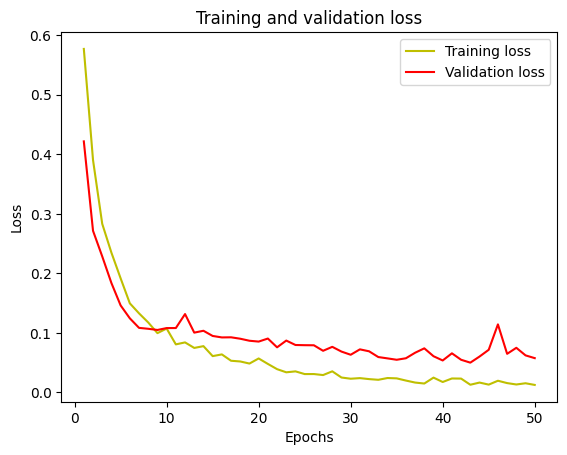

In [ ]:
#plot the training and validation auc and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(history.history.keys())


dict_keys(['auc', 'loss', 'val_auc', 'val_loss'])


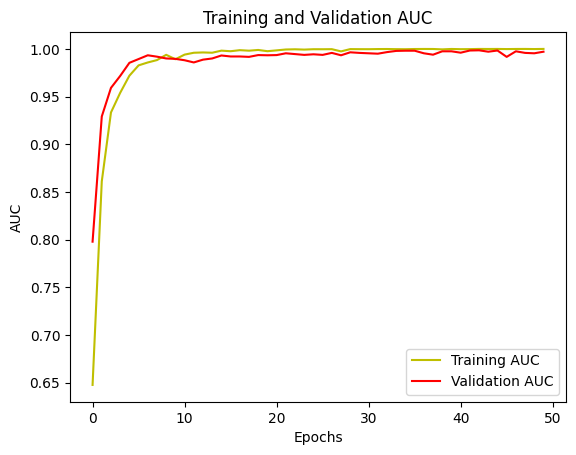

In [ ]:
epochs = range(len(history.history['auc']))
train_auc = history.history['auc']
val_auc = history.history['val_auc']

plt.plot(epochs, train_auc, 'y', label='Training AUC')
plt.plot(epochs, val_auc, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


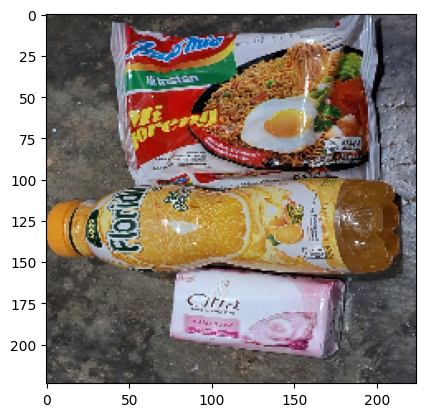

In [ ]:
#Validate on an image
#img = image.load_img('/content/Multi_Label_dataset/Images/tt0085318.jpg', target_size=(SIZE,SIZE,3))
# Assuming 'ddlj.jpg' is in '/content/Multi_Label_dataset/Images/'
img = image.load_img('/content/Deeplearning/DatasetMultilabel_Indah Purnama Sari_202255202010/Gambar301.jpg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

In [ ]:
#Print classes and corresponding probabilities
for i in range(len(classes)):  # Change to iterate over the length of classes
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

Mi Instan (1.0)
Minuman (1.0)
Sabun (0.985)
Biskuit (0.0012)


In [ ]:
###################################################

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

################################################################

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - auc: 0.9971 - loss: 0.0577
Accuracy =  99.70834255218506 %


In [ ]:
# prompt: berikan code evaluasi model

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (e.g., using a threshold)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming 0.5 as the threshold

# Calculate and print the classification report
print(classification_report(y_test, y_pred_classes, target_names=classes))


# Calculate and print the confusion matrix (optional)
# Note: Confusion matrices are best visualized for binary or few-class problems
# For multi-label, confusion matrix for each label is more informative
for i in range(len(classes)):
  print(f"Confusion Matrix for {classes[i]}:")
  print(confusion_matrix(y_test[:,i], y_pred_classes[:,i]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
              precision    recall  f1-score   support

     Biskuit       1.00      1.00      1.00        25
     Minuman       1.00      0.93      0.96        29
       Sabun       1.00      1.00      1.00        22
   Mi Instan       1.00      0.96      0.98        24

   micro avg       1.00      0.97      0.98       100
   macro avg       1.00      0.97      0.99       100
weighted avg       1.00      0.97      0.98       100
 samples avg       1.00      0.97      0.98       100

Confusion Matrix for Biskuit:
[[ 6  0]
 [ 0 25]]
Confusion Matrix for Minuman:
[[ 2  0]
 [ 2 27]]
Confusion Matrix for Sabun:
[[ 9  0]
 [ 0 22]]
Confusion Matrix for Mi Instan:
[[ 7  0]
 [ 1 23]]
